Esse projeto tem como objetivo aplicar meus aprendizados de análise de dados com Python em um projeto de dados abertos referentes à segurança pública. Será trabalhado com duas tabelas, a Ocorrências que possui as colunas UF, tipo de crime, ano, mês, ocorrência. A outra tabela é de vítimas, que possui os campos UF, tipo de crime, ano, mês, sexo da vitima e vítimas.

In [34]:
#Primeiro importnado bibliotecas que serão utilizadas
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import statistics as sts
import seaborn as sns

In [35]:

#trazendo a base de dados para o python
caminho='indicadoressegurancapublicauf.xlsx'
df=pd.ExcelFile(caminho)
df.sheet_names

['Ocorrências', 'Vítimas']

In [36]:
#trazendo a tabela ocorrências
ocorrencia = pd.read_excel(caminho, sheet_name=df.sheet_names[0])
ocorrencia.head()

,UF,Tipo Crime,Ano,Mês,Ocorrências
0,Acre,Estupro,2022,janeiro,31
1,Acre,Furto de veículo,2022,janeiro,50
2,Acre,Homicídio doloso,2022,janeiro,10
3,Acre,Lesão corporal seguida de morte,2022,janeiro,1
4,Acre,Roubo a instituição financeira,2022,janeiro,0


In [37]:
#trazendo a tabela vítimas
vitimas = pd.read_excel(caminho, sheet_name=df.sheet_names[1])
vitimas.head()

,UF,Tipo Crime,Ano,Mês,Sexo da Vítima,Vítimas
0,Acre,Homicídio doloso,2022,janeiro,Feminino,2
1,Acre,Homicídio doloso,2022,janeiro,Masculino,8
2,Acre,Homicídio doloso,2022,janeiro,Sexo NI,0
3,Acre,Homicídio doloso,2022,fevereiro,Feminino,0
4,Acre,Homicídio doloso,2022,fevereiro,Masculino,10


Na tabela vítimas existe no campo de sexo uma informação chamada "sexo NI", entrei em contato com o MJSP para entender que tipo de informação era essa, como até o momento não obtive resposta, apenas removerei as linhas que possuem essa informação para não afetar os resultados.

In [38]:
vitimas = vitimas[vitimas['Sexo da Vítima'] != 'Sexo NI']
vitimas.head(20)

,UF,Tipo Crime,Ano,Mês,Sexo da Vítima,Vítimas
0,Acre,Homicídio doloso,2022,janeiro,Feminino,2
1,Acre,Homicídio doloso,2022,janeiro,Masculino,8
3,Acre,Homicídio doloso,2022,fevereiro,Feminino,0
4,Acre,Homicídio doloso,2022,fevereiro,Masculino,10
6,Acre,Homicídio doloso,2022,março,Feminino,2
7,Acre,Homicídio doloso,2022,março,Masculino,19
9,Acre,Homicídio doloso,2022,abril,Feminino,2
10,Acre,Homicídio doloso,2022,abril,Masculino,19
11,Acre,Homicídio doloso,2022,maio,Feminino,6
12,Acre,Homicídio doloso,2022,maio,Masculino,17


Agora fiz a verificação se existia mais alguma informação nula ou vazia em algum campos da tabela, como resultados vê-se que não

In [39]:
vitimas.isnull().any()
ocorrencia.isnull().any()

UF             False
Tipo Crime     False
Ano            False
Mês            False
Ocorrências    False
dtype: bool

Quando comecei a analisar as informações para excel, fiz algumas perguntas e percebi que podia fazer algumas análises para responder com a estatística básica.


1. Top 3 estados por crime no ano de 2022
2. Top 3 crimes por estado no ano de 2018
3. Quais violências atingem mais as mulheres?
4. Quais violências atingem mais os homens?
5. Qual mês mais violento por crime?
6. Qual mês mais violento por crime em cada estado?
7. Quais os crimes com maior frequência em cada ano?
8. Quais os crimes com maior frequência em cada ano no estado?


Como tenho duas tabelas com informações complementares e distintas, informarei qual tabela usarei para responder cada pergunta, para não misturar informações e acabar "sujando" a análise.






# Top 3 estados por crime no ano de 2022


Utilizarei a tabela ocorrência para análise das informações.
Comecei a filtrar o ano em que eu queria analisar.
Depois, agrupei pelo tipo de crime e estado, somando as ocorrências.
Por fim, usando um short, ordeno em forma decrescente a quantidade de ocorrências por estado, para verificar quais estados possuem maior frequência em cada crime.





In [40]:
ocorrencia2022=ocorrencia[ocorrencia['Ano']==2022]
agrupado=ocorrencia2022.groupby(['Tipo Crime','UF']).agg({'Ocorrências': 'sum'}).reset_index()
top_3_estados_por_crime = agrupado.sort_values(['Tipo Crime', 'Ocorrências'], ascending=[True, False]).groupby('Tipo Crime').head(3)

print(top_3_estados_por_crime)

                              Tipo Crime                   UF  Ocorrências
25                               Estupro            São Paulo        12615
13                               Estupro               Paraná         5920
20                               Estupro       Rio de Janeiro         5114
52                      Furto de veículo            São Paulo        92868
39                      Furto de veículo         Minas Gerais        19145
47                      Furto de veículo       Rio de Janeiro        16848
58                      Homicídio doloso                Bahia         4687
70                      Homicídio doloso           Pernambuco         3144
79                      Homicídio doloso            São Paulo         2909
106      Lesão corporal seguida de morte            São Paulo           94
99       Lesão corporal seguida de morte  Rio Grande do Norte           77
85       Lesão corporal seguida de morte                Bahia           57
128       Roubo a institu

Para visualizar gráficamente essa solução. 

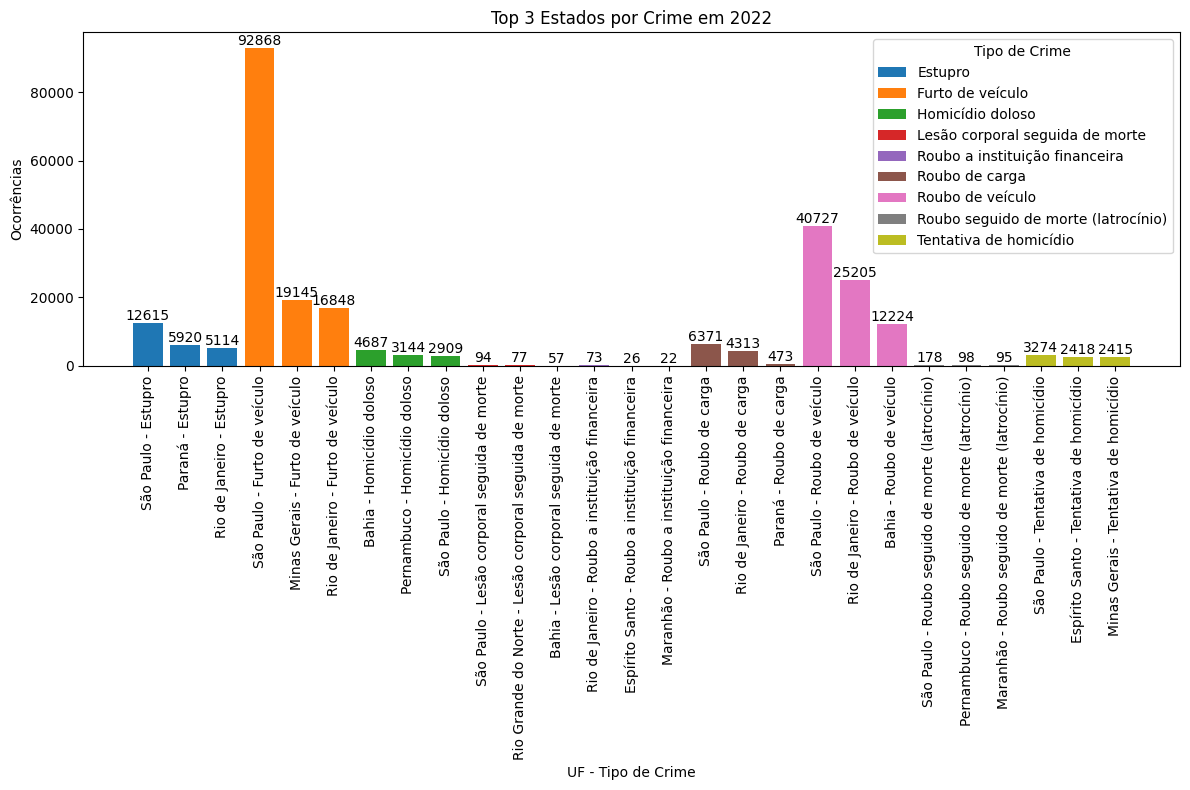

In [43]:
plt.figure(figsize=(12, 8))#define tamanho do grafico
for crime in top_3_estados_por_crime['Tipo Crime'].unique():
    subset = top_3_estados_por_crime[top_3_estados_por_crime['Tipo Crime'] == crime]#tipo de crime é o crime
    bars=plt.bar(subset['UF'] + ' - ' + crime, subset['Ocorrências'], label=crime)#combina o nome do estado com tipo de crime para ser feito a verificacao
    
    for bar, value in zip(bars, subset['Ocorrências']):#aqui adiciona os rótulos nas colunas
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(value), ha='center', va='bottom', fontsize=10)

plt.xlabel('UF - Tipo de Crime')
plt.ylabel('Ocorrências')
plt.title('Top 3 Estados por Crime em 2022')
plt.legend(title='Tipo de Crime')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Top 3 crimes por estado no ano de 2018
